# <b>CS156 (Introduction to AI), Fall 2022</b>
# <u><b>Homework 5 submission</b></u>

### Roster Name: Kyle Louderback
### Student ID: 015331667
### Email address: kyle.louderback@sjsu.edu


##  <u>References and sources </u>

Yulia Newton code sample <br>
https://pbpython.com/categorical-encoding.html




##  <u>Solution</u>

#### Load libraries and set random number generator seed

#### Code the solution

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
airline = pd.read_csv('/content/gdrive/MyDrive/homework5_input_data.csv')
airline.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


##Gender, Customer Type, Type of Travel, Class
https://pbpython.com/categorical-encoding.html

In [3]:
airline_cat = airline.select_dtypes(include=['object']).copy()
airline_cat.shape
airline_cat.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,satisfied
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,satisfied


In [4]:
airline_cat = airline_cat.drop(columns='satisfaction')

In [5]:
airline_cat_res = pd.get_dummies(airline_cat)
airline_cat_res.head()


,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,0,1,1,0,0,1,0,0,1
1,0,1,0,1,1,0,1,0,0
2,1,0,1,0,1,0,1,0,0
3,1,0,1,0,1,0,1,0,0
4,0,1,1,0,1,0,1,0,0


In [6]:
airline_drop = airline.drop(columns=['Gender','Customer Type','Type of Travel','Class','satisfaction'])
airline_drop.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0


In [ ]:
#airline_cat_res.reset_index(drop=True, inplace=True), airline_drop.reset_index(drop=True, inplace=True)

In [7]:
from pandas.core.internals import concat
airline_concat = pd.concat([airline_drop, airline_cat_res], axis=1)

In [8]:
airline_concat.shape
airline_concat.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,...,18.0,0,1,1,0,0,1,0,0,1
1,25,235,3,2,3,3,1,3,1,1,...,6.0,0,1,0,1,1,0,1,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,0.0,1,0,1,0,1,0,1,0,0
3,25,562,2,5,5,5,2,2,2,2,...,9.0,1,0,1,0,1,0,1,0,0
4,61,214,3,3,3,3,4,5,5,3,...,0.0,0,1,1,0,1,0,1,0,0


In [9]:
Y = airline['satisfaction']
X = airline_concat._get_numeric_data()
Y.shape,X.shape

((103594,), (103594, 27))

In [10]:
Y.head(), X.head()

(0    neutral or dissatisfied
 1    neutral or dissatisfied
 2                  satisfied
 3    neutral or dissatisfied
 4                  satisfied
 Name: satisfaction, dtype: object,
    Age  Flight Distance  Inflight wifi service  \
 0   13              460                      3   
 1   25              235                      3   
 2   26             1142                      2   
 3   25              562                      2   
 4   61              214                      3   
 
    Departure/Arrival time convenient  Ease of Online booking  Gate location  \
 0                                  4                       3              1   
 1                                  2                       3              3   
 2                                  2                       2              2   
 3                                  5                       5              5   
 4                                  3                       3              3   
 
    Food and drink  Onli

# Split Train Test

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((82875, 27), (82875,), (20719, 27), (20719,))

#Build Split Tree


In [12]:
model = DecisionTreeClassifier(random_state=0)


score = cross_val_score(model, X_train, Y_train, cv=5)
score


array([0.94365008, 0.94129713, 0.94449472, 0.94533937, 0.94292609])

In [13]:
score.mean()

0.9435414781297133

In [14]:
model.fit(X_train, Y_train)

print('Accuracy of decision tree model on training set: {:.2f}'.format(model.score(X_train, Y_train)))

print('Accuracy of decision tree model on test set: {:.2f}'.format(model.score(X_test, Y_test)))

Accuracy of decision tree model on training set: 1.00
Accuracy of decision tree model on test set: 0.95


In [15]:
airline[:0]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix, without normalization
[[11174   546]
 [  554  8445]]
Normalized confusion matrix
[[0.95 0.05]
 [0.06 0.94]]


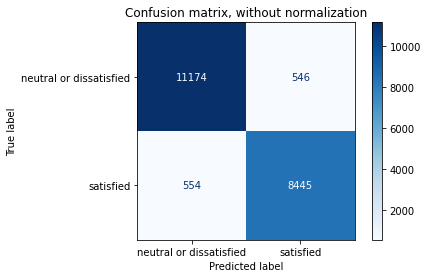

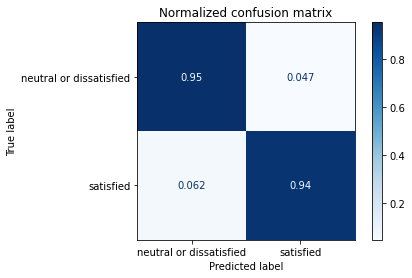

In [19]:
np.set_printoptions(precision=2)
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, Y_test,
                                 display_labels=list(set(list(Y))),
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()